In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Advertising dataset

In [2]:
adv = pd.read_csv('Advertising.csv',index_col=0)
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


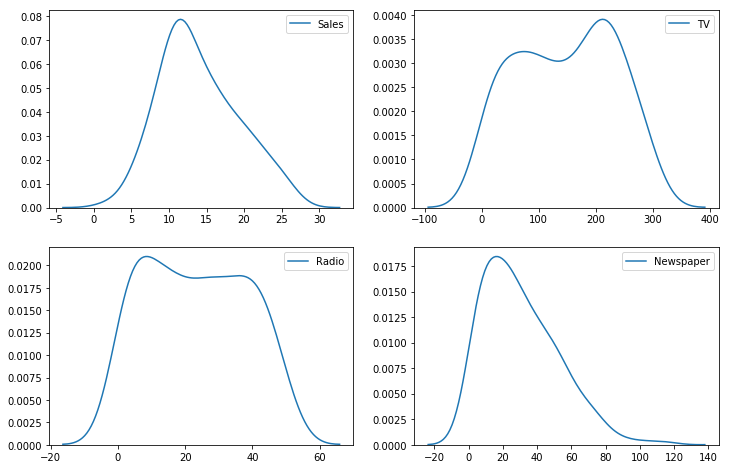

In [5]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(adv['Sales'],ax=ax[0,0])
sns.kdeplot(adv['TV'],ax=ax[0,1])
sns.kdeplot(adv['Radio'],ax=ax[1,0])
sns.kdeplot(adv['Newspaper'],ax=ax[1,1])
plt.show()

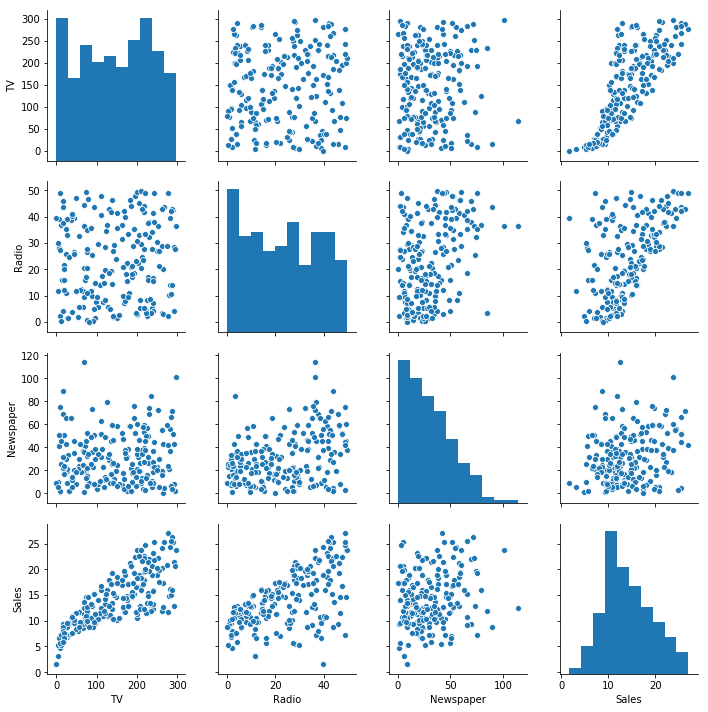

In [6]:
sns.pairplot(adv)
plt.show()

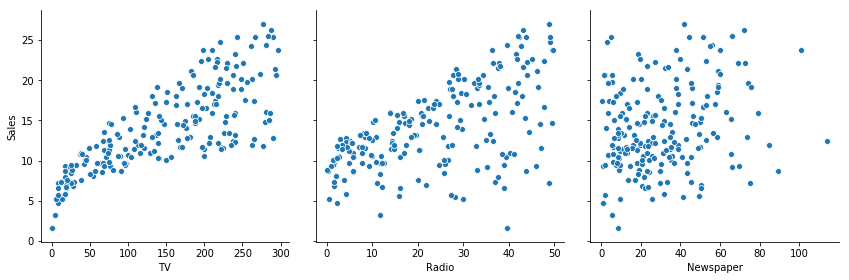

In [7]:
sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4)
plt.show()

In [8]:
X1 = adv[['TV','Radio','Newspaper']]
y1 = adv['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3, random_state=100)

In [10]:
print(X1_train.shape)
print(X1_test.shape)

(140, 3)
(60, 3)


In [11]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lm1.intercept_

2.6527896688794943

In [13]:
DataFrame(lm1.coef_, X1_train.columns, columns=['Coefficient'])

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [14]:
lm1.predict([[1000000,0,0]])

array([45428.24881367])

In [15]:
y1_pred = lm1.predict(X1_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y1_test,y1_pred)
r_sq = r2_score(y1_test,y1_pred)
print('MSE =',mse)
print('R^2 =',r_sq)

MSE = 1.8506819941636972
R^2 = 0.9058622107532245


In [17]:
X2 = adv[['TV','Radio']]
y2 = adv['Sales']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=100)
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)
print('Intercept =', lm2.intercept_)
print(DataFrame({'TV':lm2.coef_[0], 'Radio':lm2.coef_[1]}, index=['Coefficient']))
print()
y2_pred = lm2.predict(X2_test)
print('MSE =',mean_squared_error(y2_test,y2_pred))
print('R^2 =',r2_score(y2_test,y2_pred))

Intercept = 2.7190400406029234
                   TV     Radio
Coefficient  0.045533  0.192488

MSE = 1.784740052090281
R^2 = 0.909216449171822


In [18]:
import statsmodels.api as sm
X1_train_sm = X1_train
X1_train.sm = sm.add_constant(X1_train_sm)
lm3 = sm.OLS(y1_train,X1_train.sm).fit()
lm3.params

C:\Users\mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [19]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           9.97e-66
Time:                        12:50:25   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
Radio          0.1898      0.011     17.009      0.000       0.168       0.212
Newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X2_train_sm = X2_train
X2_train.sm = sm.add_constant(X2_train_sm)
lm4 = sm.OLS(y2_train,X2_train.sm).fit()
lm4.params

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [21]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           4.46e-67
Time:                        12:50:25   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.000       1.992       3.446
TV             0.0455      0.002     27.368      0.000       0.042       0.049
Radio          0.1925      0.010     18.860      0.000       0.172       0.213
==============================================================================
Omnibus:                       41.530   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.544
Skew:                          -1.255   Prob(JB):                     2.18e-20
Kurtosis:                       6.037   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Baseball dataset

In [22]:
bb = pd.read_csv('baseballs.csv',header=None,
                 names=['batting_average','runs_scored','doubles_at_ball','triples_at_bat','home_runs','strike_outs'])
bb.head()

,batting_average,runs_scored,doubles_at_ball,triples_at_bat,home_runs,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [23]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
batting_average    45 non-null float64
runs_scored        45 non-null float64
doubles_at_ball    45 non-null float64
triples_at_bat     45 non-null float64
home_runs          45 non-null float64
strike_outs        45 non-null float64
dtypes: float64(6)
memory usage: 2.2 KB


In [24]:
bb.describe()

,batting_average,runs_scored,doubles_at_ball,triples_at_bat,home_runs,strike_outs
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.280467,0.150889,0.046356,0.011289,0.024267,0.104333
std,0.044002,0.042009,0.010452,0.006960,0.022260,0.063057
min,0.188000,0.064000,0.025000,0.001000,0.000000,0.000000
25%,0.248000,0.119000,0.039000,0.007000,0.009000,0.062000
50%,0.290000,0.150000,0.045000,0.009000,0.013000,0.095000
75%,0.308000,0.189000,0.053000,0.016000,0.039000,0.138000
max,0.367000,0.259000,0.068000,0.030000,0.085000,0.264000


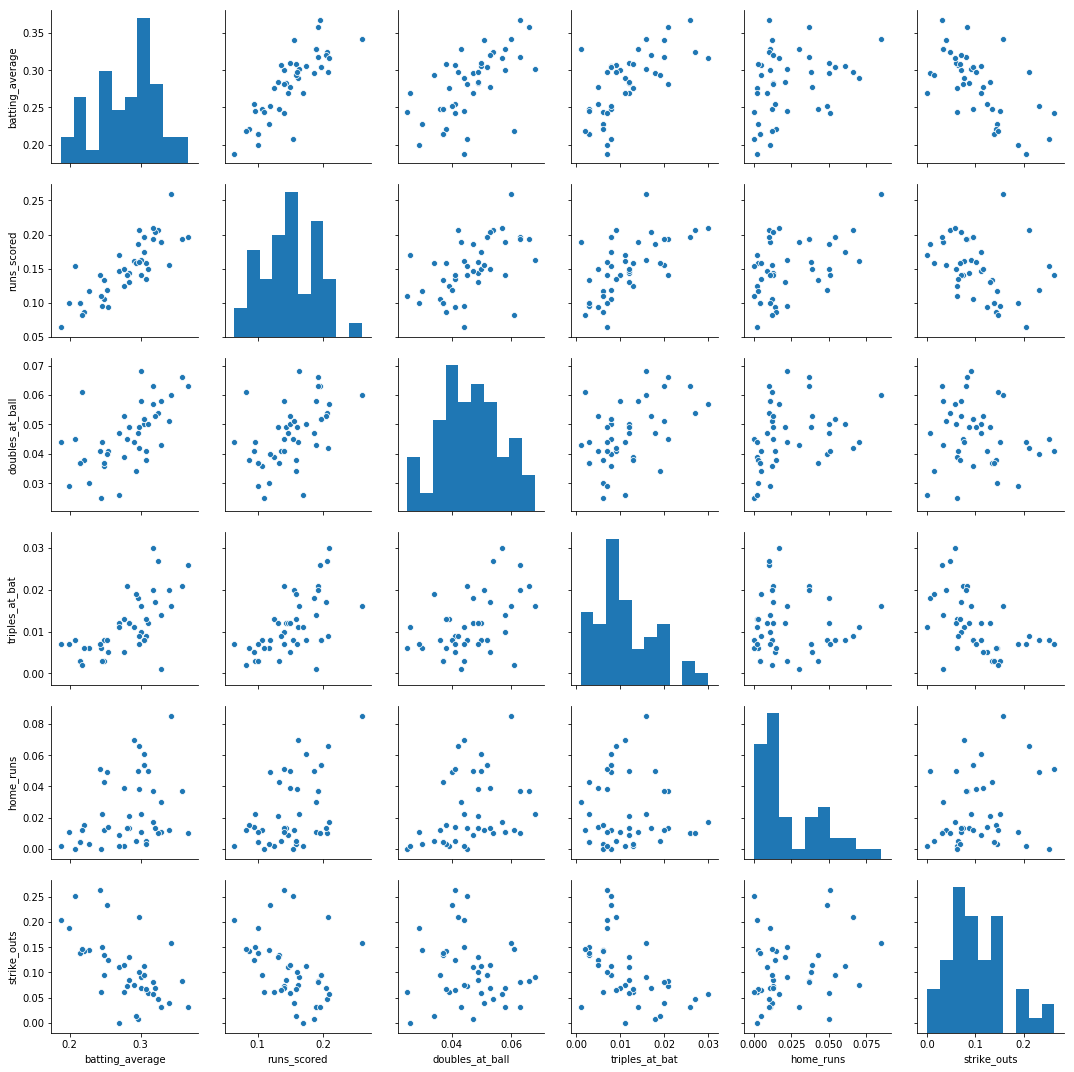

In [25]:
sns.pairplot(bb)
plt.show()

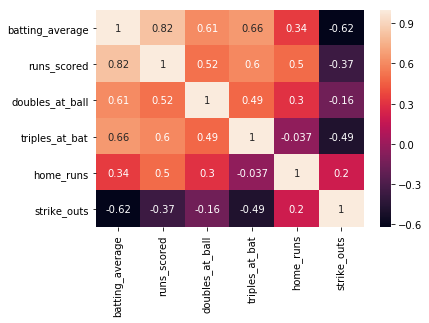

In [26]:
sns.heatmap(bb.corr(),annot=True)
plt.show()

### Linearity

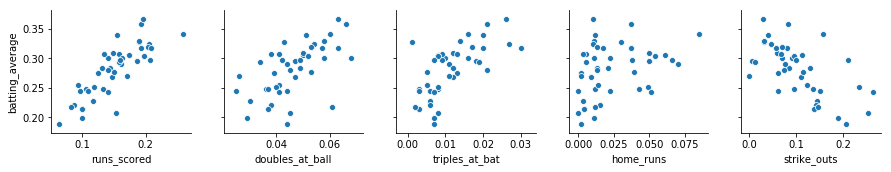

In [27]:
sns.pairplot(bb, x_vars=['runs_scored','doubles_at_ball','triples_at_bat','home_runs','strike_outs'],
            y_vars='batting_average')
plt.show()

In [28]:
x = bb.drop(['batting_average'],axis=1)
y = bb['batting_average']

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)

(33, 5)
(12, 5)


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X)

In [33]:
print('R^2 = {}'.format(r2_score(y,y_pred)))

R^2 = 0.860127109323749


### Mean of Residuals

In [34]:
residuals = y.values - y_pred
print('Mean of Residuals =',np.mean(residuals))

Mean of Residuals = -4.5642502123478656e-17


### Heteroscedasticity

**Goldfeld Quandt Test**  
$H_0 :$ Error terms are homoscedastic   
$H_a :$ Error terms are heteroscedastic

In [35]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 0.5498487747620252), ('p-value', 0.8879983647242132)]

- pvalue > 0.05 implies we fail to reject null hypothesis
- residuals are homoscedastic

### Normality of Residuals

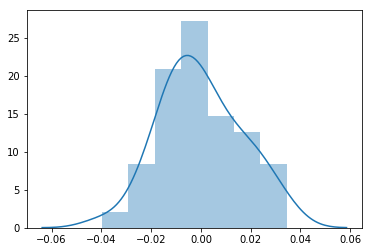

In [36]:
sns.distplot(residuals,kde=True)
plt.show()

In [37]:
stats.shapiro(residuals)

(0.9800715446472168, 0.6226047277450562)

- pvalue > 0.05 implies residuals are normally distributed

### Autocorrelation

**Ljungbox Test**  
$H_0 =$ autocorrelation is absent  
$H_a =$ autocorrelation is present

In [38]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals, lags=40)[1])

0.18636075094145213

- pvalue > 0.05 implies we cannot reject $H_0$
- residuals are not autocorrelated

In [39]:
residuals

array([ 0.00041522,  0.00737126, -0.00529027,  0.0180779 , -0.01305086,
       -0.03970168,  0.00059201, -0.0004412 ,  0.00476948,  0.01656723,
       -0.00473406,  0.00707485,  0.03444153, -0.01418482,  0.00133451,
        0.00666407,  0.02396253,  0.02705534, -0.00456015,  0.02366471,
        0.03273109, -0.01140733, -0.00645471,  0.02378317, -0.00954958,
        0.00055826,  0.01043758, -0.01331009, -0.02280601, -0.00101018,
        0.01304015, -0.02279771, -0.01143216, -0.00262437, -0.00610656,
       -0.01214157,  0.01713741, -0.01140733,  0.00780131, -0.01391408,
       -0.01418482, -0.02493353,  0.0175528 , -0.0222471 , -0.00674219])

In [40]:
help(diag.acorr_ljungbox)

Help on function acorr_ljungbox in module statsmodels.sandbox.stats.diagnostic:

acorr_ljungbox(x, lags=None, boxpierce=False)
    Ljung-Box test for no autocorrelation
    
    Parameters
    ----------
    x : array_like, 1d
        data series, regression residuals when used as diagnostic test
    lags : None, int or array_like
        If lags is an integer then this is taken to be the largest lag
        that is included, the test result is reported for all smaller lag length.
        If lags is a list or array, then all lags are included up to the largest
        lag in the list, however only the tests for the lags in the list are
        reported.
        If lags is None, then the default maxlag is 'min((nobs // 2 - 2), 40)'
    boxpierce : {False, True}
        If true, then additional to the results of the Ljung-Box test also the
        Box-Pierce test results are returned
    
    Returns
    -------
    lbvalue : float or array
        test statistic
    pvalue : float or ar